# Batch Normalization

### Intuition

Batch normalization is used to smoothen the loss landscape. It is inserted after a fully connected layer and before a non-linearity

**Covariate Shift:** occurs when the model is fed data that conforms to the function although is of a completely different distribution. E.g. the graph below shows how different distributions fall on the function

![image](https://miro.medium.com/v2/resize:fit:640/format:webp/0*nhhxZaYW3UjLA9wW.png)

### Advantage
1. Batch normalization enables the model to converge faster, thus reducing the training time.
2. Improve the gradient flow through the network
3. Allows for higher learning rates
4. Reduces a strong dependence on initialization
5. Is somewhat a form of regularization and reduces the need for dropout (maybe)

### Disadvantage
1. Doesn't work well with smaller batch sizes
2. Doesn't work with RNN

### What is it used for?
Batch normalization is used to improve gradient descent by making each step on the same scale. It works by first normalizing the data so that all points all between 0 and 1. Batch Normalization is also a layer that sits in after an activation function

If inputs are on the same scale then their is less of a difference in range for the weights, thus back-propogation sped up by spending less time jumping between the range of weights.

### Parameters
- Learnable: beta and gamma
- Non-learnable: mean moving average and variance moving average

![image](https://miro.medium.com/v2/resize:fit:720/format:webp/0*OyVlWTVJufivCfjT.png)

![image](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*VsN_9_AN2ji8hCZYSTTV0w.png)


## Example in PyTorch

### Loading Dataset and Visualization

In [34]:
import torch
import numpy as np

import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
training_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

In [28]:
batch_size = 4
training_loader = torch.utils.data.DataLoader(training_set, batch_size=batch_size, shuffle=True)

In [29]:
data_points = iter(training_loader)
images, labels = next(data_points)

print(images.shape)
print(labels[0].shape)
print(labels[0].item())

torch.Size([4, 1, 28, 28])
torch.Size([])
6


In [30]:
def imshow(img, title):
    plt.figure(figsize=(batch_size * 4, 4))
    plt.axis('off')
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.title(title)
    plt.show()

In [35]:
def show_batch_images(data_loader):
    images, labels = next(iter(data_loader))
    
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])
    
    return images, labels

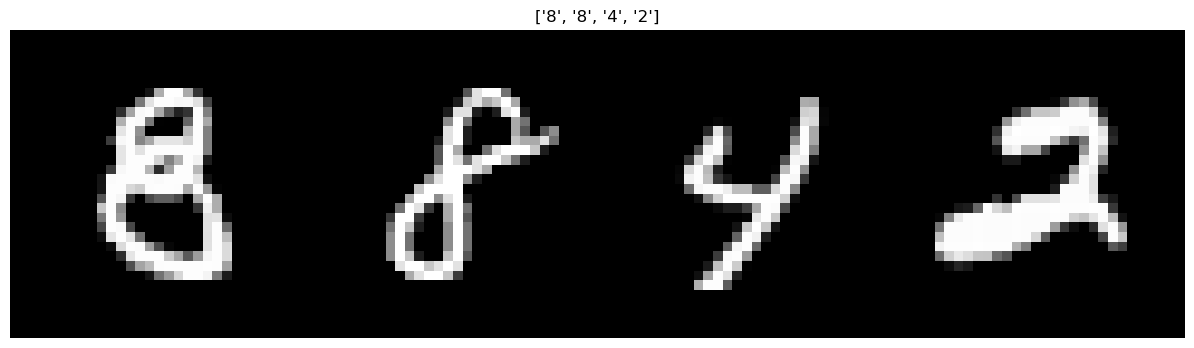

In [37]:
images, labels = show_batch_images(training_loader)

### Batch Normalization

In [63]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(784, 48), # 28 x 28 = 784
            nn.ReLU(),
            nn.Linear(48, 24),
            nn.ReLU(),
            nn.Linear(24, 10) # 10 numbers for output (0-9)
        )
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [64]:
class NN_Batch_Norm(nn.Module):
    def __init__(self):
        super(NN_Batch_Norm, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(784, 48), # 28 x 28 = 784
            nn.BatchNorm1d(48),
            nn.ReLU(),
            nn.Linear(48, 24),
            nn.BatchNorm1d(24),
            nn.ReLU(),
            nn.Linear(24, 10) # 10 numbers for output (0-9)
        )
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [65]:
model = NN()
print(model)

model_batch_norm = NN_Batch_Norm()
print(model_batch_norm)

NN(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): ReLU()
    (2): Linear(in_features=48, out_features=24, bias=True)
    (3): ReLU()
    (4): Linear(in_features=24, out_features=10, bias=True)
  )
)
NN_Batch_Norm(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=48, out_features=24, bias=True)
    (4): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=24, out_features=10, bias=True)
  )
)


/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

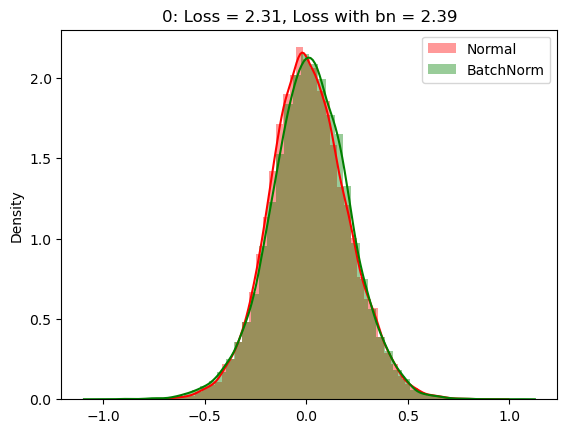

/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

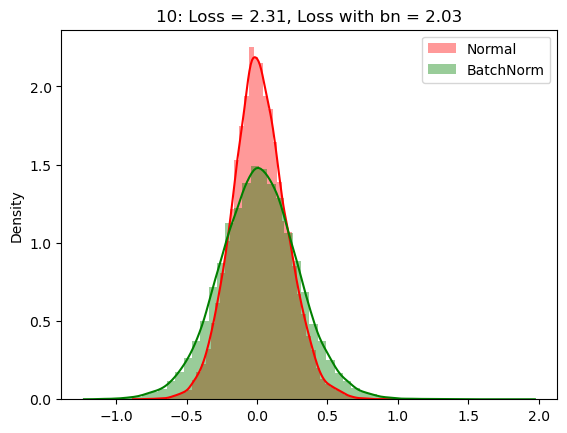

/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

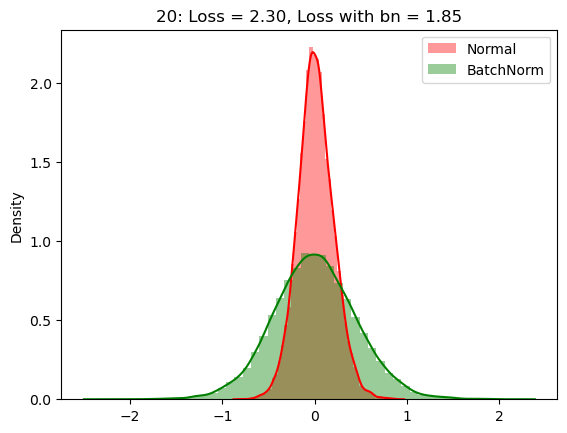

/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

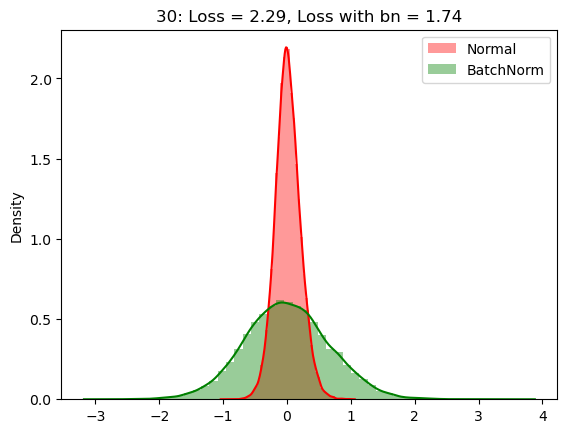

/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

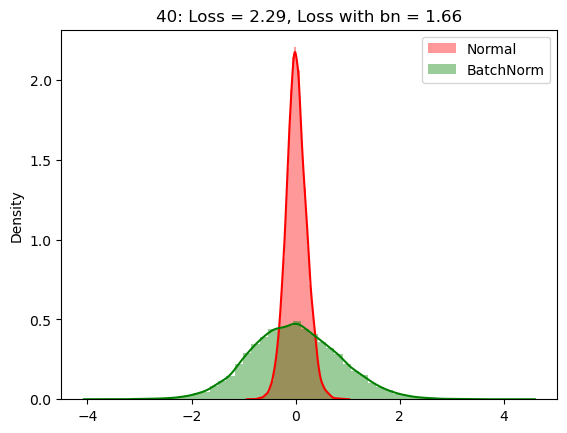

/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

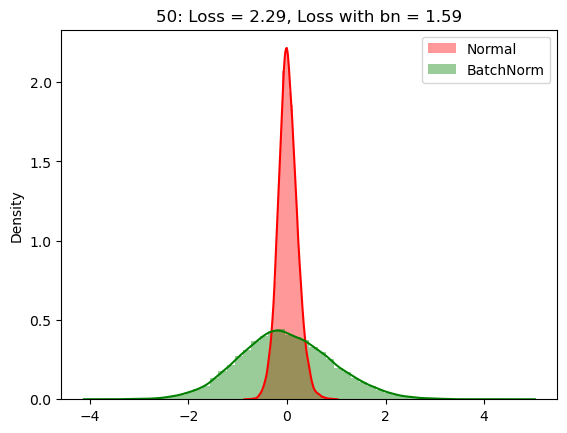

/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

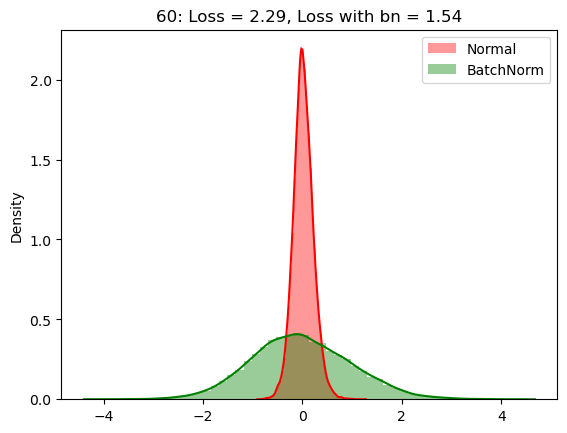

/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

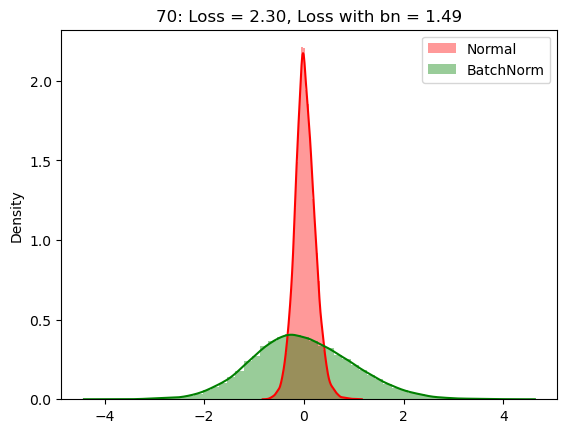

/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

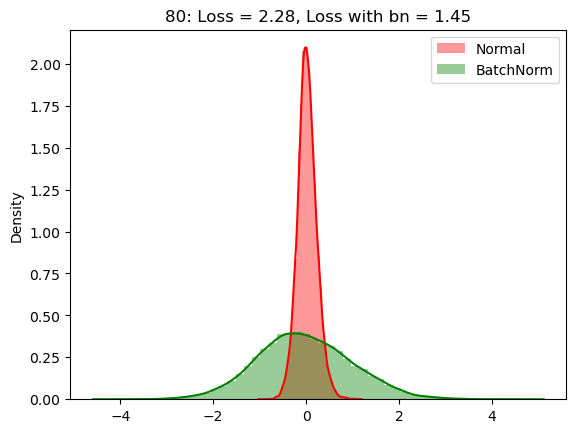

/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

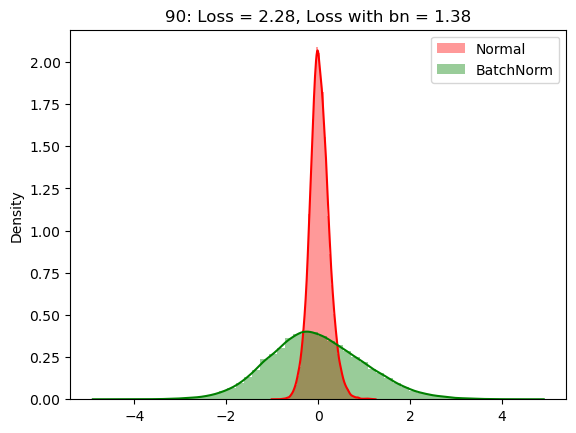

/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

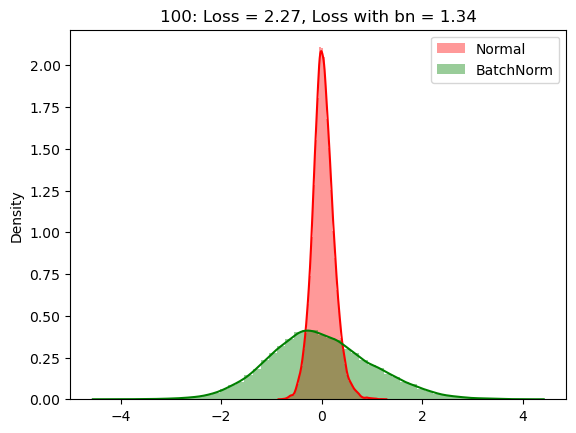

/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

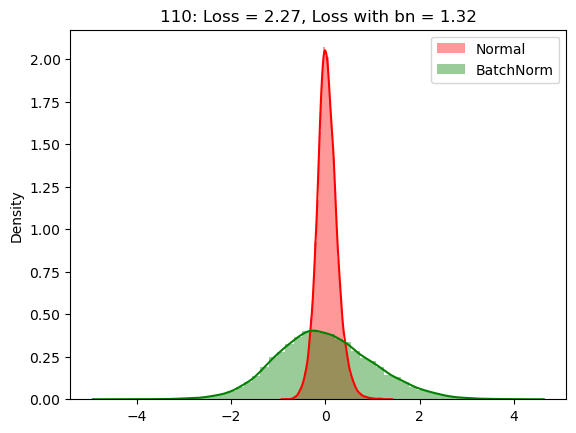

 --------------------- 


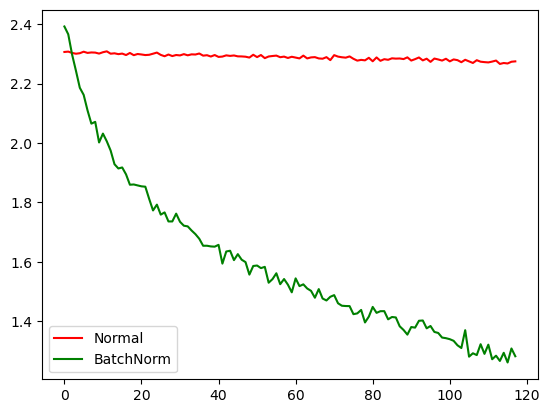

/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

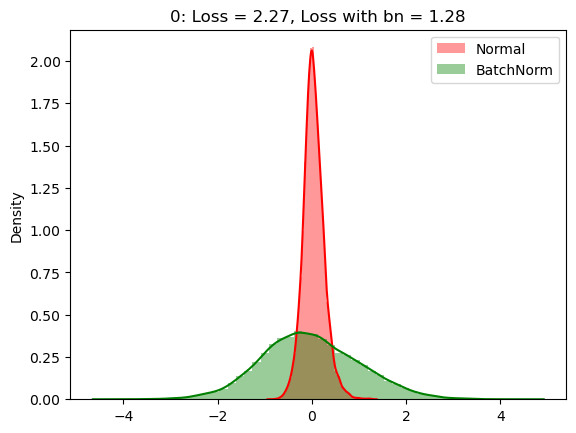

/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

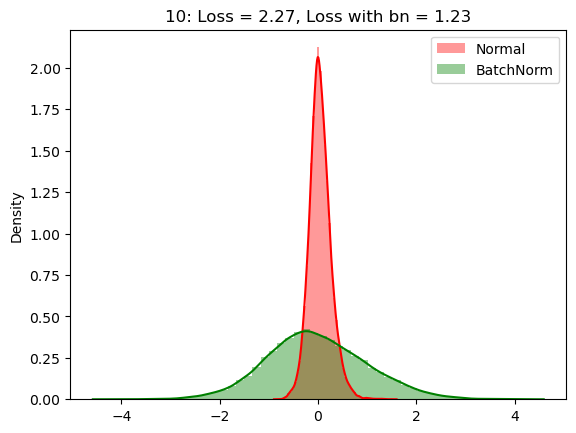

/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

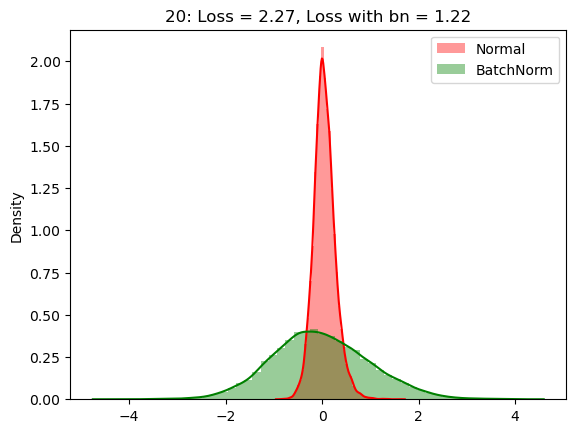

/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

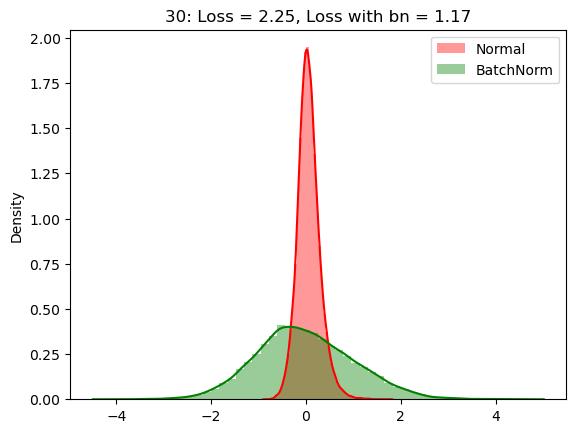

/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

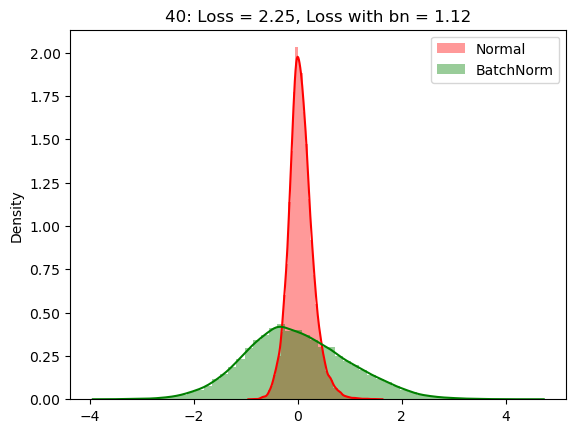

/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

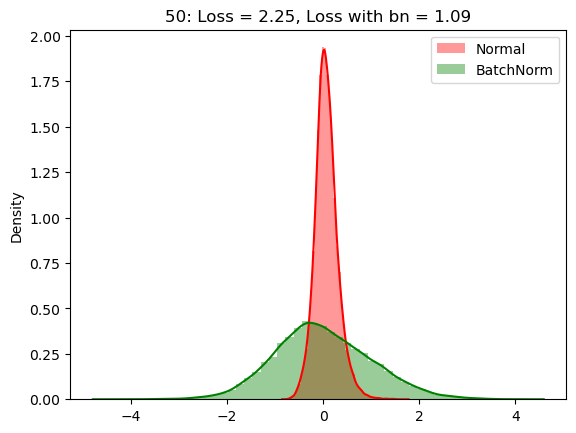

/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

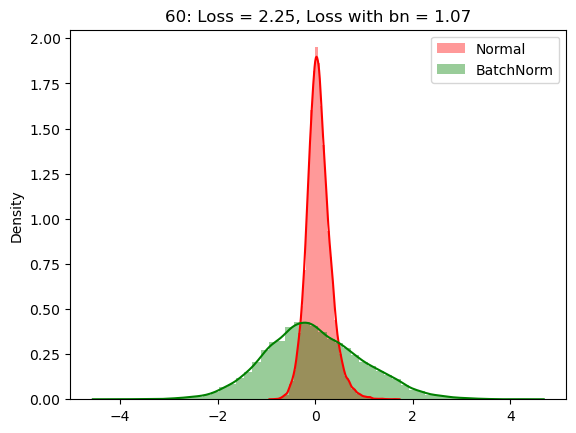

/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

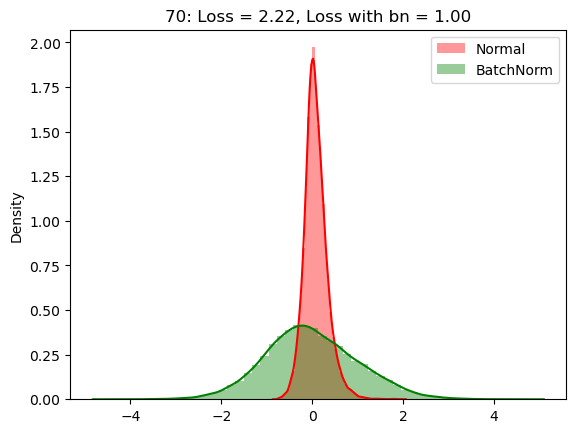

/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

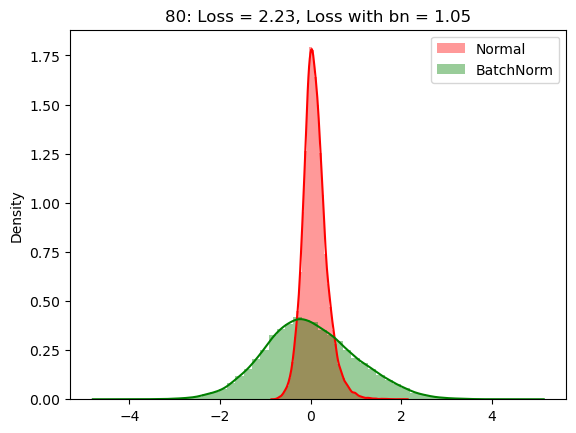

/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

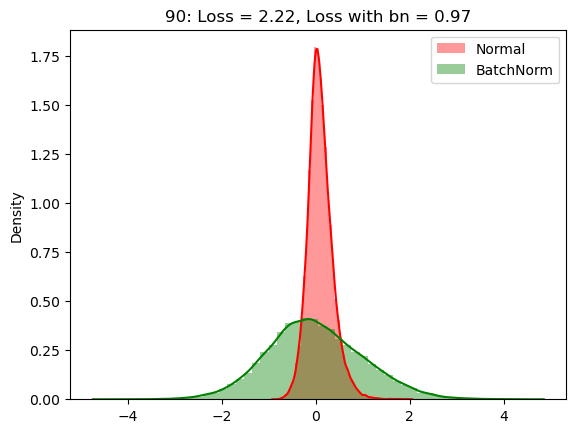

/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

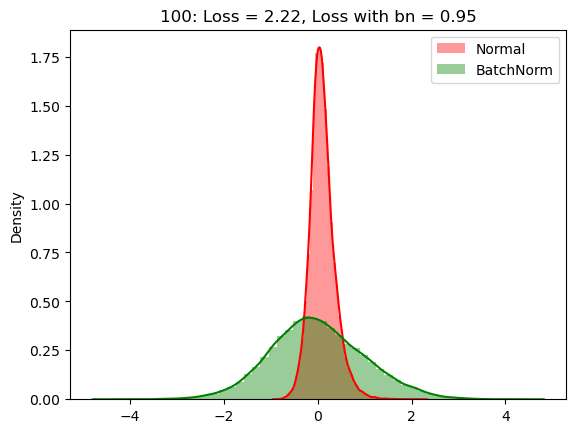

/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde=True, color='r', label='Normal')
/var/folders/pk/slcvyfmx6c5d_n5d5472zg740000gn/T/ipykernel_14969/3751508180.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

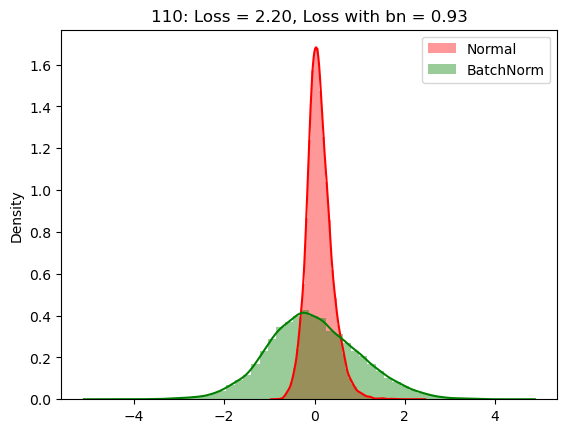

 --------------------- 


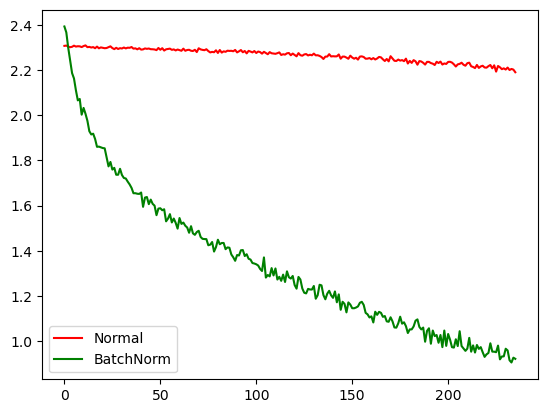

In [66]:
batch_size = 512
trainloader = torch.utils.data.DataLoader(training_set, batch_size=batch_size, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

optimizer_batch_norm = optim.SGD(model_batch_norm.parameters(), lr=0.01)

loss_arr = []
loss_arr_batch_norm = []

n_epochs = 2

for epoch in range(n_epochs):
    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data
        
        # training steps for model
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # training steps for batch norm model
        optimizer_batch_norm.zero_grad()
        outputs_batch_norm = model_batch_norm(inputs)
        loss_batch_norm = criterion(outputs_batch_norm, labels)  # Corrected here
        loss_batch_norm.backward()
        optimizer_batch_norm.step()
        
        loss_arr.append(loss.item())
        loss_arr_batch_norm.append(loss_batch_norm.item())
        
        if i % 10 == 0: # show every ten
            inputs = inputs.view(inputs.size(0), -1)
            
            model.eval()
            model_batch_norm.eval()
            
            a = model.classifier[0](inputs)
            a = a.detach().numpy().ravel()
            sns.distplot(a, kde=True, color='r', label='Normal') 
            
            b = model_batch_norm.classifier[0](inputs)
            b = model_batch_norm.classifier[1](b)
            b = b.detach().numpy().ravel()
            
            sns.distplot(b, kde=True, color='g', label='BatchNorm') 
            plt.title('%d: Loss = %0.2f, Loss with bn = %0.2f' % (i, loss.item(), loss_batch_norm.item()))
            plt.legend()
            plt.show()
            plt.pause(0.5)
            
            model.train()
            model_batch_norm.train()
            
    print(' --------------------- ')
    
    plt.plot(loss_arr, 'r', label='Normal')
    plt.plot(loss_arr_batch_norm, 'g', label='BatchNorm')  # Corrected here
    plt.legend()
    plt.show()
